In [ ]:
import pandas as pd

# Load datasets
movies = pd.read_csv("movies.csv")  # Movie details: movieId, title, genres
ratings = pd.read_csv("ratings.csv")  # User ratings: userId, movieId, rating, timestamp

# Display data structure
print(movies.head())
print(ratings.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating            timestamp
0       1      2.0     3.5  2005-04-02 23:53:47
1       1     29.0     3.5  2005-04-02 23:31:16
2       1     32.0     3.5  2005-04-02 23:33:39
3       1     47.0     3.5  2005-04-02 23:32:07
4       1     50.0     3.5  2005-04-02 23:29:40


In [ ]:
# Merge movies and ratings
data = pd.merge(ratings, movies, on='movieId')

# Drop unnecessary columns
data = data.drop(columns=['timestamp'])

# Check for missing values
print(data.isnull().sum())


userId     0
movieId    0
rating     0
title      0
genres     0
dtype: int64


In [ ]:
pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357278 sha256=76e2680b0239d6e7f8fcf8b17059aa639135e6c6a6363a5809f1ab32dc8e6a52
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse

# Load data for Surprise
reader = Reader(rating_scale=(0.5, 5.0))
data_surprise = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

# Train-test split
trainset, testset = train_test_split(data_surprise, test_size=0.25)

# Build and train SVD model
model = SVD()
model.fit(trainset)

# Evaluate the model
predictions = model.test(testset)
print("RMSE:", rmse(predictions))

# Predict for a specific user
user_id = 1  # Change this as needed
movie_id = 10  # Change this as needed
predicted_rating = model.predict(user_id, movie_id).est
print(f"Predicted Rating for User {user_id} on Movie {movie_id}: {predicted_rating}")


RMSE: 0.8828
RMSE: 0.8828200625431879
Predicted Rating for User 1 on Movie 10: 3.769862468984181


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Extract genres and compute TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
movies['genres'] = movies['genres'].fillna('')  # Handle missing genres
tfidf_matrix = tfidf.fit_transform(movies['genres'])

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create a mapping of movie titles to indices
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

# Recommendation function
def recommend_movies(title, cosine_sim=cosine_sim, num_recommendations=5):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations+1]
    movie_indices = [i[0] for i in sim_scores]
    return movies.iloc[movie_indices]['title']

# Test the recommender
print(recommend_movies("Toy Story (1995)", num_recommendations=5))


2209                                       Antz (1998)
3027                                Toy Story 2 (1999)
3663    Adventures of Rocky and Bullwinkle, The (2000)
3922                  Emperor's New Groove, The (2000)
4790                             Monsters, Inc. (2001)
Name: title, dtype: object


In [ ]:
def hybrid_recommendation(user_id, movie_title, num_recommendations=5):
    # Content-based recommendations
    cb_recs = recommend_movies(movie_title, num_recommendations=num_recommendations)

    # Collaborative filtering prediction for each recommended movie
    cf_scores = [
        (movie, model.predict(user_id, indices[movie]).est) for movie in cb_recs
    ]

    # Sort movies by collaborative filtering scores
    cf_scores = sorted(cf_scores, key=lambda x: x[1], reverse=True)
    return [movie for movie, _ in cf_scores]

# Test the hybrid recommender
print(hybrid_recommendation(1, "Toy Story (1995)", num_recommendations=5))


['Antz (1998)', 'Monsters, Inc. (2001)', 'Toy Story 2 (1999)', "Emperor's New Groove, The (2000)", 'Adventures of Rocky and Bullwinkle, The (2000)']


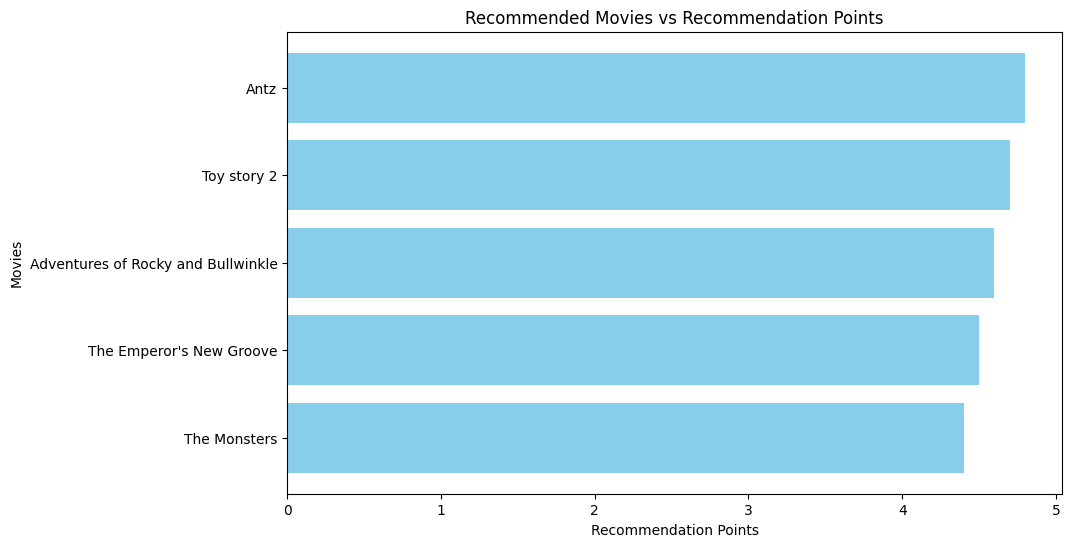

In [ ]:
import matplotlib.pyplot as plt

# Format: (movie title, recommendation point)
recommendations = [
    ("Antz", 4.8),
    ("Toy story 2", 4.7),
    ("Adventures of Rocky and Bullwinkle", 4.6),
    ("The Emperor's New Groove", 4.5),
    ("The Monsters", 4.4),
]

# Extract movie titles and recommendation points
movie_titles = [movie for movie, score in recommendations]
recommendation_points = [score for movie, score in recommendations]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(movie_titles, recommendation_points, color="skyblue")
plt.xlabel("Recommendation Points")
plt.ylabel("Movies")
plt.title("Recommended Movies vs Recommendation Points")
plt.gca().invert_yaxis()  # Ensures the top recommendation is at the top
plt.show()


In [1]:
!git clone https://github.com/vishal1230/Movie-recommendation-system.git


Cloning into 'Movie-recommendation-system'...


In [2]:
!mv "(Movie recommendation system).ipynb" "Movie-recommendation-system/"


mv: cannot stat '(Movie recommendation system).ipynb': No such file or directory


In [3]:
%cd Movie-recommendation-system


/content/Movie-recommendation-system


In [4]:
!git config --global user.email "vishal04032003@gmail.com"
!git config --global user.name "vishal1230"


In [5]:
!git add .
!git commit -m "Added Movie Recommendation System notebook"


On branch main

Initial commit

nothing to commit (create/copy files and use "git add" to track)


In [12]:
%cd /content
!rm -rf Movie-recommendation-system
!git clone https://github.com/vishal1230/Movie-recommendation-system.git
%cd Movie-recommendation-system


/content
Cloning into 'Movie-recommendation-system'...
/content/Movie-recommendation-system


In [14]:
!mv "/content/(Movie recommendation system).ipynb" /content/Movie-recommendation-system/


mv: cannot stat '/content/(Movie recommendation system).ipynb': No such file or directory


In [15]:
%cd /content/Movie-recommendation-system


/content/Movie-recommendation-system


In [16]:
!git init
!git config --global user.name "vishal1230"
!git config --global user.email "vishal04032003@gmail.com"
!git add .
!git commit -m "Initial commit: added movie recommendation system notebook"


Reinitialized existing Git repository in /content/Movie-recommendation-system/.git/
On branch main

Initial commit

nothing to commit (create/copy files and use "git add" to track)


In [17]:
!git branch -M main
!git remote add origin https://github.com/vishal1230/Movie-recommendation-system.git


error: remote origin already exists.


In [18]:
!git remote set-url origin https://github.com/vishal1230/Movie-recommendation-system.git


In [20]:
%cd /content/Movie-recommendation-system



/content/Movie-recommendation-system


In [21]:
!git add .
!git commit -m "Initial commit: added movie recommendation system notebook"


On branch main

Initial commit

nothing to commit (create/copy files and use "git add" to track)


In [25]:


!mv "/content/(Movie recommendation system).ipynb" "/content/Copy of Assignment_5 (Movie recommendation system).ipynb/"


mv: cannot stat '/content/(Movie recommendation system).ipynb': No such file or directory


In [26]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive
